## Assignment 4 - Check the Quality of Clustering

## Import libraries needed for the project

In [11]:
# import modules

import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
import os

import random
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#!pip install plotly
from IPython.display import display, Markdown, Latex
import plotly.express as px
import datetime

from plotly import graph_objects as go
from plotly.subplots import make_subplots

#! pip install seaborn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
sns.set()
pd.options.mode.chained_assignment = None  # default='warn'

import warnings
warnings.filterwarnings("ignore")

## In stage 3, the team decided to run it for K = 2,3,4 as we do not have predefined target variable so we will see which K makes more sense after running for K = 2, 3 and 4

# install neccessary packages

In [ ]:
! pip install -U notebook-as-pdf

In [12]:
! pyppeteer-install

[W:pyppeteer.command] chromium is already installed.


In [ ]:
! jupyter-nbconvert --to pdfviahtml phaseV1.ipynb

In [ ]:
! pip install yellowbrick

## Read the saved data after RFM

In [6]:
df_RFM2= pd.read_csv(r'df_RFM2.csv')

In [7]:
df_RFM2.head()

,Unnamed: 0,user_id,Recency,Frequency,Monetary
0,0,9794320,3,2,7.72
1,1,10079204,3,2,25.81
2,2,10280338,0,19,63.29
3,3,12055855,2,4,16.54
4,4,12936739,1,2,29.89


In [8]:
df_RFM3=df_RFM2.drop(columns=['user_id','Unnamed: 0'])

X = StandardScaler().fit_transform(df_RFM3)

In [9]:
df_RFM3.head()

,Recency,Frequency,Monetary
0,3,2,7.72
1,3,2,25.81
2,0,19,63.29
3,2,4,16.54
4,1,2,29.89


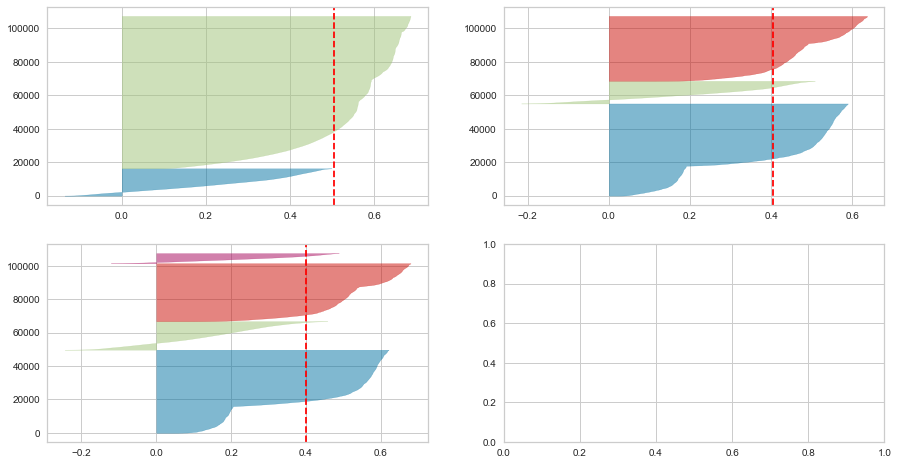

In [10]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

## Silhoutte width  with 4 clusters shows the all clusters are above average width and is maximum width crossing the 0.6. 
## With two clusters it is unbalance and one cluster is below average width.
## With 3 clusters all are above average width but overall width of clusters is less than 0.6.
## Clusters with highest silhotte width should be selected.

### Hyperparameter Set-1

In [13]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [14]:
import cProfile, pstats, io
from pstats import SortKey

In [15]:
pr = cProfile.Profile()
pr.enable()
km=KMeans(n_clusters=4, **kmeans_kwargs)
km.fit(X)
pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

# The number of iterations required to converge
print(km.n_iter_) ## It shows only 17 are required as it is converging in 17 no need to increase from 300 to 500

## 26653 function calls (26633 primitive calls) in 1.514 seconds
## Just use the above line only in reporting

         28150 function calls (27536 primitive calls) in 1.846 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    1.860    0.620 C:\Users\hasty\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3302(run_code)
        3    0.000    0.000    1.860    0.620 {built-in method builtins.exec}
        1    0.001    0.001    1.860    1.860 <ipython-input-15-c6b8fc438a63>:4(<module>)
        1    0.056    0.056    1.859    1.859 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:953(fit)
       10    0.028    0.003    1.717    0.172 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:301(_kmeans_single_elkan)
      198    1.324    0.007    1.345    0.007 sklearn\cluster\_k_means_elkan.pyx:184(__pyx_fuse_1elkan_iter_chunked_dense)
       10    0.142    0.014    0.142    0.014 sklearn\cluster\_k_means_elkan.pyx:33(__pyx_fuse_1init_bounds_dense)
  794/200    0

## Hyperparameter set-2

In [16]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 30,
    "max_iter": 300,
    "random_state": 42,
}

In [17]:
pr = cProfile.Profile()
pr.enable()
km=KMeans(n_clusters=4, **kmeans_kwargs)
km.fit(X)
pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

# The number of iterations required to converge
print(km.n_iter_) ## It shows only 14 are required

##  86075 function calls (86015 primitive calls) in 4.769 seconds
## Just use the above line only in reporting

         91030 function calls (89035 primitive calls) in 5.579 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    5.619    1.873 C:\Users\hasty\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3302(run_code)
        3    0.000    0.000    5.619    1.873 {built-in method builtins.exec}
        1    0.001    0.001    5.619    5.619 <ipython-input-17-811fd224606e>:4(<module>)
        1    0.067    0.067    5.619    5.619 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:953(fit)
       30    0.085    0.003    5.325    0.177 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:301(_kmeans_single_elkan)
      645    4.123    0.006    4.187    0.006 sklearn\cluster\_k_means_elkan.pyx:184(__pyx_fuse_1elkan_iter_chunked_dense)
       30    0.425    0.014    0.425    0.014 sklearn\cluster\_k_means_elkan.pyx:33(__pyx_fuse_1init_bounds_dense)
 2582/647    0

## Hyperparameter set-3

In [18]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [19]:
pr = cProfile.Profile()
pr.enable()
km=KMeans(n_clusters=4, **kmeans_kwargs)
km.fit(X)
pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

# The number of iterations required to converge
print(km.n_iter_) ## It shows only 16 are required

##  28979 function calls (28809 primitive calls) in 1.517 seconds
## Just use the above line only in reporting

         36260 function calls (35387 primitive calls) in 1.807 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    1.819    0.606 C:\Users\hasty\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3302(run_code)
        3    0.000    0.000    1.819    0.606 {built-in method builtins.exec}
        1    0.001    0.001    1.819    1.819 <ipython-input-19-c0a14389bdd3>:4(<module>)
        1    0.059    0.059    1.817    1.817 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:953(fit)
       10    0.023    0.002    1.380    0.138 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:301(_kmeans_single_elkan)
      181    1.054    0.006    1.072    0.006 sklearn\cluster\_k_means_elkan.pyx:184(__pyx_fuse_1elkan_iter_chunked_dense)
       10    0.003    0.000    0.357    0.036 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:895(_init_cen

## Hyperparameter Set-4

In [20]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 30,
    "max_iter": 300,
    "random_state": 42,
}

In [21]:
pr = cProfile.Profile()
pr.enable()
km=KMeans(n_clusters=4, **kmeans_kwargs)
km.fit(X)
pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

# The number of iterations required to converge
print(km.n_iter_) ## It shows only 24 are required

##  85906 function calls (85396 primitive calls) in 4.363 seconds
## Just use the above line only in reporting

         107800 function calls (105190 primitive calls) in 5.503 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    5.543    1.848 C:\Users\hasty\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3302(run_code)
        3    0.000    0.000    5.543    1.848 {built-in method builtins.exec}
        1    0.002    0.002    5.543    5.543 <ipython-input-21-b765125e35f8>:4(<module>)
        1    0.065    0.065    5.542    5.542 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:953(fit)
       30    0.071    0.002    4.318    0.144 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:301(_kmeans_single_elkan)
      540    3.287    0.006    3.343    0.006 sklearn\cluster\_k_means_elkan.pyx:184(__pyx_fuse_1elkan_iter_chunked_dense)
       30    0.010    0.000    1.136    0.038 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:895(_init_c

## Hyperparameter Set-5

In [22]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 60,
    "max_iter": 300,
    "random_state": 42,
}

In [23]:
pr = cProfile.Profile()
pr.enable()
km=KMeans(n_clusters=4, **kmeans_kwargs)
km.fit(X)
pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

# The number of iterations required to converge
print(km.n_iter_) ## It shows only 17 are required as it is converging in 20 no need to increase from 300 to 500

## 177122 function calls (173285 primitive calls) in 5.200 seconds
## Just use the above line only in reporting

         174640 function calls (170803 primitive calls) in 10.629 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000   10.725    3.575 C:\Users\hasty\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3302(run_code)
        3    0.000    0.000   10.725    3.575 {built-in method builtins.exec}
        1    0.001    0.001   10.725   10.725 <ipython-input-23-1265c177b5c4>:4(<module>)
        1    0.077    0.077   10.724   10.724 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:953(fit)
       60    0.164    0.003   10.238    0.171 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:301(_kmeans_single_elkan)
     1239    7.875    0.006    8.003    0.006 sklearn\cluster\_k_means_elkan.pyx:184(__pyx_fuse_1elkan_iter_chunked_dense)
       60    0.842    0.014    0.842    0.014 sklearn\cluster\_k_means_elkan.pyx:33(__pyx_fuse_1init_bounds_dense)
4958/1241  

## Hyperparameter Set-6

In [24]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 60,
    "max_iter": 300,
    "random_state": 42,
}

In [25]:
pr = cProfile.Profile()
pr.enable()
km=KMeans(n_clusters=4, **kmeans_kwargs)
km.fit(X)
pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

# The number of iterations required to converge
print(km.n_iter_) ## It shows only 17 are required as it is converging in 17 no need to increase from 300 to 500

## 209650 function calls (204631 primitive calls) in 5.476 seconds
## Just use the above line only in reporting

         205940 function calls (200921 primitive calls) in 10.146 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000   10.209    3.403 C:\Users\hasty\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3302(run_code)
        3    0.000    0.000   10.209    3.403 {built-in method builtins.exec}
        1    0.001    0.001   10.209   10.209 <ipython-input-25-dba40e7dfc47>:4(<module>)
        1    0.079    0.079   10.207   10.207 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:953(fit)
       60    0.130    0.002    7.893    0.132 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:301(_kmeans_single_elkan)
     1013    6.005    0.006    6.106    0.006 sklearn\cluster\_k_means_elkan.pyx:184(__pyx_fuse_1elkan_iter_chunked_dense)
       60    0.020    0.000    2.213    0.037 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:895(_init_

## Hyperparameter Set-7

In [26]:
#Hyperparameter 7
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 500,
    "random_state": 42,
}

In [27]:
pr = cProfile.Profile()
pr.enable()
km=KMeans(n_clusters=4, **kmeans_kwargs)
km.fit(X)
pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

# The number of iterations required to converge
print(km.n_iter_) ## It shows only 17 are required as it is converging in 17 no need to increase from 300 to 500

## 26653 function calls (26633 primitive calls) in 1.514 seconds
## Just use the above line only in reporting

         28150 function calls (27536 primitive calls) in 1.749 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    1.761    0.587 C:\Users\hasty\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3302(run_code)
        3    0.000    0.000    1.761    0.587 {built-in method builtins.exec}
        1    0.001    0.001    1.761    1.761 <ipython-input-27-c6b8fc438a63>:4(<module>)
        1    0.055    0.055    1.760    1.760 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:953(fit)
       10    0.027    0.003    1.628    0.163 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:301(_kmeans_single_elkan)
      198    1.250    0.006    1.270    0.006 sklearn\cluster\_k_means_elkan.pyx:184(__pyx_fuse_1elkan_iter_chunked_dense)
       10    0.133    0.013    0.133    0.013 sklearn\cluster\_k_means_elkan.pyx:33(__pyx_fuse_1init_bounds_dense)
  794/200    0

## Hyperparameter Set-8

In [28]:
#Hyperparameter 8
kmeans_kwargs = {
    "init": "random",
    "n_init": 30,
    "max_iter": 500,
    "random_state": 42,
}

In [29]:
pr = cProfile.Profile()
pr.enable()
km=KMeans(n_clusters=4, **kmeans_kwargs)
km.fit(X)
pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

# The number of iterations required to converge
print(km.n_iter_) ## It shows only 17 are required as it is converging in 14 no need to increase from 300 to 500

##  92324 function calls (90329 primitive calls) in 2.639 seconds
## Just use the above line only in reporting

         91030 function calls (89035 primitive calls) in 5.551 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    5.592    1.864 C:\Users\hasty\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3302(run_code)
        3    0.000    0.000    5.592    1.864 {built-in method builtins.exec}
        1    0.001    0.001    5.592    5.592 <ipython-input-29-093af59465b5>:4(<module>)
        1    0.066    0.066    5.590    5.590 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:953(fit)
       30    0.089    0.003    5.300    0.177 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:301(_kmeans_single_elkan)
      645    4.096    0.006    4.162    0.006 sklearn\cluster\_k_means_elkan.pyx:184(__pyx_fuse_1elkan_iter_chunked_dense)
       30    0.416    0.014    0.416    0.014 sklearn\cluster\_k_means_elkan.pyx:33(__pyx_fuse_1init_bounds_dense)
 2582/647    0

## Hyperparameter Set-9

In [30]:
#Hyperparameter 9
kmeans_kwargs = {
    "init": "random",
    "n_init": 60,
    "max_iter": 500,
    "random_state": 42,
}

In [31]:
pr = cProfile.Profile()
pr.enable()
km=KMeans(n_clusters=4, **kmeans_kwargs)
km.fit(X)
pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

# The number of iterations required to converge
print(km.n_iter_) ## It shows only 17 are required as it is converging in 17 no need to increase from 300 to 500

## 26653 function calls (26633 primitive calls) in 1.514 seconds
## Just use the above line only in reporting

         174640 function calls (170803 primitive calls) in 10.784 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000   10.862    3.621 C:\Users\hasty\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3302(run_code)
        3    0.000    0.000   10.862    3.621 {built-in method builtins.exec}
        1    0.001    0.001   10.862   10.862 <ipython-input-31-c6b8fc438a63>:4(<module>)
        1    0.082    0.082   10.861   10.861 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:953(fit)
       60    0.175    0.003   10.346    0.172 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:301(_kmeans_single_elkan)
     1239    7.952    0.006    8.077    0.007 sklearn\cluster\_k_means_elkan.pyx:184(__pyx_fuse_1elkan_iter_chunked_dense)
       60    0.855    0.014    0.855    0.014 sklearn\cluster\_k_means_elkan.pyx:33(__pyx_fuse_1init_bounds_dense)
4958/1241  

## Hyperparameter Set-10

In [32]:
#Hyperparameter 10
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 500,
    "random_state": 42,
}

In [33]:
pr = cProfile.Profile()
pr.enable()
km=KMeans(n_clusters=4, **kmeans_kwargs)
km.fit(X)
pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

# The number of iterations required to converge
print(km.n_iter_) ## It shows only 17 are required as it is converging in 17 no need to increase from 300 to 500

## 26653 function calls (26633 primitive calls) in 1.514 seconds
## Just use the above line only in reporting

         36260 function calls (35387 primitive calls) in 1.861 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    1.873    0.624 C:\Users\hasty\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3302(run_code)
        3    0.000    0.000    1.873    0.624 {built-in method builtins.exec}
        1    0.001    0.001    1.873    1.873 <ipython-input-33-c6b8fc438a63>:4(<module>)
        1    0.055    0.055    1.871    1.871 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:953(fit)
       10    0.025    0.002    1.426    0.143 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:301(_kmeans_single_elkan)
      181    1.083    0.006    1.101    0.006 sklearn\cluster\_k_means_elkan.pyx:184(__pyx_fuse_1elkan_iter_chunked_dense)
       10    0.003    0.000    0.371    0.037 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:895(_init_cen

## Hyperparameter Set-11

In [34]:
#Hyperparameter 11
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 30,
    "max_iter": 500,
    "random_state": 42,
}

In [35]:
pr = cProfile.Profile()
pr.enable()
km=KMeans(n_clusters=4, **kmeans_kwargs)
km.fit(X)
pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

# The number of iterations required to converge
print(km.n_iter_) ## It shows only 17 are required as it is converging in 17 no need to increase from 300 to 500

## 26653 function calls (26633 primitive calls) in 1.514 seconds
## Just use the above line only in reporting

         107800 function calls (105190 primitive calls) in 5.613 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    5.648    1.883 C:\Users\hasty\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3302(run_code)
        3    0.000    0.000    5.648    1.883 {built-in method builtins.exec}
        1    0.002    0.002    5.648    5.648 <ipython-input-35-c6b8fc438a63>:4(<module>)
        1    0.068    0.068    5.646    5.646 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:953(fit)
       30    0.079    0.003    4.396    0.147 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:301(_kmeans_single_elkan)
      540    3.330    0.006    3.388    0.006 sklearn\cluster\_k_means_elkan.pyx:184(__pyx_fuse_1elkan_iter_chunked_dense)
       30    0.010    0.000    1.165    0.039 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:895(_init_c

## Hyperparameter Set-12

In [36]:
#Hyperparameter 12
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 60,
    "max_iter": 500,
    "random_state": 42,
}

In [37]:
pr = cProfile.Profile()
pr.enable()
km=KMeans(n_clusters=4, **kmeans_kwargs)
km.fit(X)
pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

# The number of iterations required to converge
print(km.n_iter_) ## It shows only 17 are required as it is converging in 17 no need to increase from 300 to 500

## 26653 function calls (26633 primitive calls) in 1.514 seconds
## Just use the above line only in reporting

         205940 function calls (200921 primitive calls) in 10.737 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000   10.803    3.601 C:\Users\hasty\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3302(run_code)
        3    0.000    0.000   10.803    3.601 {built-in method builtins.exec}
        1    0.001    0.001   10.803   10.803 <ipython-input-37-c6b8fc438a63>:4(<module>)
        1    0.081    0.081   10.802   10.802 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:953(fit)
       60    0.147    0.002    8.353    0.139 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:301(_kmeans_single_elkan)
     1013    6.306    0.006    6.419    0.006 sklearn\cluster\_k_means_elkan.pyx:184(__pyx_fuse_1elkan_iter_chunked_dense)
       60    0.022    0.000    2.351    0.039 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:895(_init_

## Above outputs show that the same result is achieved much faster with K-Means++ Initializations and less number of iterations and also with less number of starting initial points.

## Based on above outputs the below Hyperparameters are selected 

In [38]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [39]:
pr = cProfile.Profile()
pr.enable()
km=KMeans(n_clusters=4, **kmeans_kwargs)
km.fit(X)
pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

# The number of iterations required to converge
print(km.n_iter_) ## It shows only 16 are required

##  28979 function calls (28809 primitive calls) in 1.515 seconds
## Just use the above line only in reporting

         36260 function calls (35387 primitive calls) in 1.926 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    1.939    0.646 C:\Users\hasty\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3302(run_code)
        3    0.000    0.000    1.939    0.646 {built-in method builtins.exec}
        1    0.001    0.001    1.939    1.939 <ipython-input-39-059ec94900d3>:4(<module>)
        1    0.056    0.056    1.937    1.937 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:953(fit)
       10    0.026    0.003    1.477    0.148 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:301(_kmeans_single_elkan)
      181    1.132    0.006    1.151    0.006 sklearn\cluster\_k_means_elkan.pyx:184(__pyx_fuse_1elkan_iter_chunked_dense)
       10    0.004    0.000    0.390    0.039 C:\Users\hasty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:895(_init_cen

## Hopkins Test

In [40]:
!pip install pyclustertend

  Using cached pyclustertend-1.6.2-py3-none-any.whl (7.1 kB)


In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import scale
from pyclustertend import hopkins ## the hopkins test


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [42]:
#df_RFM3.head()
hopkins(df_RFM3, df_RFM3.shape[0])

0.04235140019362386

## Clustering Quality by checking DB index

In [43]:
### index

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets import make_blobs
  
# K-Means
kmeans = km.fit(df_RFM3)
  
# we store the cluster labels
labels = km.labels_
  
print(davies_bouldin_score(df_RFM3, labels))

0.5837600680372348


In [47]:
#!pip install jqmcvi

!pip install git+https://github.com/jqmviegas/jqm_cvi.git

  Cloning https://github.com/jqmviegas/jqm_cvi.git to c:\users\hasty\appdata\local\temp\pip-req-build-xa_tra4d
  Running setup.py clean for jqmcvi
Failed to build jqmcvi
    Running setup.py install for jqmcvi: started
    Running setup.py install for jqmcvi: finished with status 'error'

  Running command git clone -q https://github.com/jqmviegas/jqm_cvi.git 'C:\Users\hasty\AppData\Local\Temp\pip-req-build-xa_tra4d'
  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\hasty\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\hasty\\AppData\\Local\\Temp\\pip-req-build-xa_tra4d\\setup.py'"'"'; __file__='"'"'C:\\Users\\hasty\\AppData\\Local\\Temp\\pip-req-build-xa_tra4d\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\hasty\AppData\Local\Temp\pip-wheel-99l4g1ub'
       cwd: C:\Users\hasty\AppData\Local\Temp\pip-req-build-xa_tra4d\
  Complete output (12 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\jqmcvi
  copying jqmcvi\base.py -> build\lib.win-amd64-3.8\jqmcv


    running build_ext
    skipping 'jqmcvi\basec.c' Cython extension (up-to-date)
    building 'jqmcvi.basec' extension
    error: Microsoft Visual C++ 14.0 is required. Get it with "Build Tools for Visual Studio": https://visualstudio.microsoft.com/downloads/
    ----------------------------------------
ERROR: Command errored out with exit status 1: 'C:\Users\hasty\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\hasty\\AppData\\Local\\Temp\\pip-req-build-xa_tra4d\\setup.py'"'"'; __file__='"'"'C:\\Users\\hasty\\AppData\\Local\\Temp\\pip-req-build-xa_tra4d\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\hasty\AppData\Local\Temp\pip-record-3cmfxtcg\install-record.txt' --single-version-externally-managed --compile --install-headers 'C:\Users\hasty\anaconda3\Include\jqmcvi' Check the logs for

## Clustering Quality by checking DB index

### It couldn't run due to problem with installing jqmsvi package

In [48]:
#### index
import pandas as pd
from sklearn import datasets
from jqmcvi import base
  
# K-Means
from sklearn import cluster
#k = cluster.KMeans(n_clusters=3)
km.fit(df_RFM3) #K-means training
y_pred = km.predict(df_RFM3)
  
# We store the K-means results in a dataframe
pred = pd.DataFrame(y_pred)
pred.columns = ['Type']
  
# we merge this dataframe with df
prediction = pd.concat([df_RFM3, pred], axis = 1)
  
# We store the clusters
clus0 = prediction.loc[prediction.Type == 0]
clus1 = prediction.loc[prediction.Type == 1]
clus2 = prediction.loc[prediction.Type == 2]
cluster_list = [clus0.values, clus1.values, clus2.values]
  
print(base.dunn(cluster_list))

ModuleNotFoundError: No module named 'jqmcvi'

# Customer Analytics

In [50]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

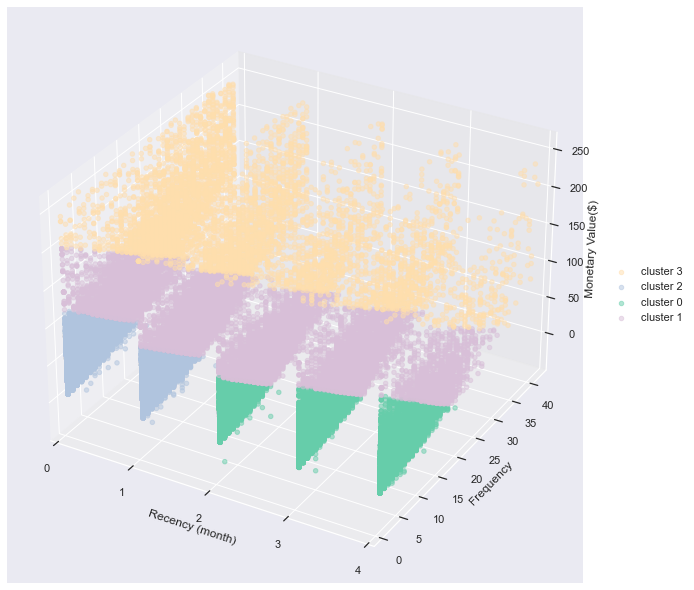

In [51]:
km=KMeans(n_clusters=4, **kmeans_kwargs)
km.fit(X)
random.seed(8)
pred=km.predict(X)
df_RFM2=df_RFM2.assign(clusters=pred)

# step 4: visualize the 4 clusters

# step 4_1: data preparation
R=[]
F=[]
M=[]
mycolors=['navajowhite','lightsteelblue','mediumaquamarine','thistle']
cluster_orders=[3,2,0,1]
for i in [0,1,2,3]:
    R.append(df_RFM2.loc[df_RFM2.clusters==cluster_orders[i],'Recency'].values.tolist())
    F.append(df_RFM2.loc[df_RFM2.clusters==cluster_orders[i],'Frequency'].values.tolist())
    M.append(df_RFM2.loc[df_RFM2.clusters==cluster_orders[i],'Monetary'].values.tolist())
    
# step 4_2: 3D scatter plot
fig=plt.figure(figsize=(10,8))
ax=Axes3D(fig)
for i in [0,1,2,3]:
    ax.scatter(R[i], F[i], M[i], c=mycolors[i], marker='o',alpha=0.5,label='cluster '+str(cluster_orders[i]))
ax.set_xlabel('Recency (month)')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value($)')
ax.set_xlim(0,4)
ax.set_xticks(list(range(5)))
ax.legend(loc='center left', bbox_to_anchor=(1.03, 0.5))
plt.show()

### replace k-means cluster names with more meaningful names

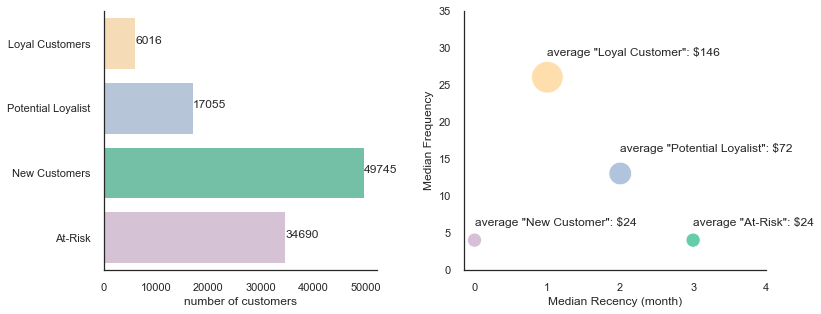

In [52]:
# replace k-means cluster names with more meaningful names
d1={0:"New Customers", 2:"At-Risk", 1: "Potential Loyalist", 3:"Loyal Customers"}
df_RFM2.loc[:,"segments"]=df_RFM2.loc[:,"clusters"].map(d1)

# calculate the number of customers, median recency, median frequency, 
# and average customer spend in each customer segment
df_RFM3=df_RFM2.groupby('segments').agg(Recency=('Recency',np.median),Frequency=('Frequency',np.median),MonetarySum=('Monetary',np.sum),size=("clusters",'size'))
df_RFM3.loc[:,'Sales/Customer']=round(df_RFM3.loc[:,'MonetarySum']/df_RFM3.loc[:,'size'])
df_RFM3=df_RFM3.astype({'Sales/Customer':int}).reset_index()

# visualize
plt.figure(figsize=(10,4))
seg_names=['Loyal Customers','Potential Loyalist','New Customers','At-Risk']

# plot the number of customers in each segment
sns.set_style("white")
plt.axes([0, 0, 0.38, 0.9])
seg=df_RFM2.groupby('segments').size().to_frame().rename(columns={0:'number of customers'}).reset_index()
sns.barplot(x='number of customers',y='segments',data=seg,order=seg_names,palette=mycolors)
for i in [0,1,2,3]:
    number=int(seg.loc[seg.segments==seg_names[i],'number of customers'])
    x_pos=round(number,-2)
    plt.text(x_pos,i,number)
plt.ylabel("")
sns.despine()

# plot recency, frequency, and average spend/customer of the 4 segments
plt.axes([0.5,0,0.42,0.9])
sns.scatterplot(x='Recency',y='Frequency',hue='segments',hue_order=seg_names,palette=mycolors,size='Sales/Customer',sizes=(200,1000),legend=False,data=df_RFM3)
plt.ylim(0,35)
plt.xticks(list(range(5)))
plt.text(1,29,'average "Loyal Customer": $146')
plt.text(2,16,'average "Potential Loyalist": $72')
plt.text(0,6,'average "New Customer": $24')
plt.text(3,6,'average "At-Risk": $24')
plt.xlabel('Median Recency (month)')
plt.ylabel('Median Frequency')
sns.despine()

In [53]:
# calculate the number of customers, median recency, median frequency, 
# and average customer spend in each customer segment
df_RFM3=df_RFM2.groupby(['segments','clusters']).agg(Recency=('Recency',np.median),Frequency=('Frequency',np.median),MonetarySum=('Monetary',np.sum),size=("clusters",'size'))
df_RFM3.loc[:,'Sales/Customer']=round(df_RFM3.loc[:,'MonetarySum']/df_RFM3.loc[:,'size'])
df_RFM3=df_RFM3.astype({'Sales/Customer':int}).reset_index()
df_RFM3

,segments,clusters,Recency,Frequency,MonetarySum,size,Sales/Customer
0,At-Risk,2,0.0,4.0,837567.91,34690,24
1,Loyal Customers,3,1.0,26.0,875527.94,6016,146
2,New Customers,0,3.0,4.0,1169121.91,49745,24
3,Potential Loyalist,1,2.0,13.0,1226137.21,17055,72


## We defined 4 clusters named as 
- At risk
- Loyal Customers
- New Customers
- Potential Loyalist